In [3]:
import xarray as xr
import numpy as np
import glob
import arrow
# import geopandas

In [5]:
arrow.now('US/Eastern')

<Arrow [2022-05-04T11:33:17.324968-04:00]>

In [2]:
pwd

'/work/albertl_uri_edu/fluxtoflow/nldas'

In [35]:
x = glob.glob('nc_sorted/2015/0101/*.nc')
print(len(x))
print(x[0])

24
nc_sorted/2015/0101/NLDAS_VIC0125_H.A20150101.0000.020.nc


In [11]:
y = xr.open_dataset(x[0])
y

/work/albertl_uri_edu/.conda/envs/sm/lib/python3.9/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:          (lon: 464, lat: 224, time: 1, bnds: 2)
Coordinates:
  * lon              (lon) float32 -124.9 -124.8 -124.7 ... -67.31 -67.19 -67.06
  * lat              (lat) float32 25.06 25.19 25.31 25.44 ... 52.69 52.81 52.94
  * time             (time) datetime64[ns] 2015-01-01
Dimensions without coordinates: bnds
Data variables: (12/45)
    time_bnds        (time, bnds) datetime64[ns] ...
    SWdown           (time, lat, lon) float32 ...
    LWdown           (time, lat, lon) float32 ...
    SWnet            (time, lat, lon) float32 ...
    LWnet            (time, lat, lon) float32 ...
    Qle              (time, lat, lon) float32 ...
    ...               ...
    ESoil            (time, lat, lon) float32 ...
    SubSnow          (time, lat, lon) float32 ...
    CanopInt         (time, lat, lon) float32 ...
    ACond            (time, lat, lon) float32 ...
    LAI              (time, lat, lon) float32 ...
    Streamflow       (time, lat, lon) float32 ...
Attributes: (12/17)
    missing_value:          -9999.0
    time_definition:        hourly
    shortname:              NLDAS_VIC0125_H_2.0
    title:                  NLDAS VIC Land Surface Model L4 Hourly 0.125 x 0....
    version:                2.0
    institution:            NASA GSFC
    ...                     ...
    websites:               https://ldas.gsfc.nasa.gov/nldas/ ; https://lis.g...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  25.0625
    SOUTH_WEST_CORNER_LON:  -124.9375
    DX:                     0.125
    DY:                     0.125

In [33]:
z = xr.Dataset(
    {
        "q0":(["lat","lon"],y.Qs.data[0]),
        "q1":(["lat","lon"],y.Qsb.data[0]),
    },
    coords = {
        "lon":(["lon"],y.lon.data),
        "lat":(["lat"],y.lat.data),
    },
)
z

<xarray.Dataset>
Dimensions:  (lat: 224, lon: 464)
Coordinates:
  * lon      (lon) float32 -124.9 -124.8 -124.7 -124.6 ... -67.31 -67.19 -67.06
  * lat      (lat) float32 25.06 25.19 25.31 25.44 ... 52.56 52.69 52.81 52.94
Data variables:
    q0       (lat, lon) float32 nan nan nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0
    q1       (lat, lon) float32 nan nan nan nan ... 0.0176 0.017 0.017 0.0141

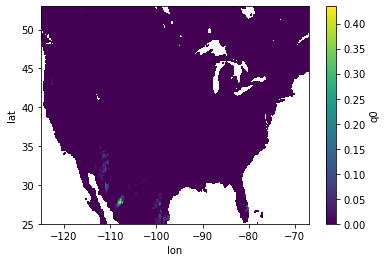

In [34]:
z.q0.plot()

In [67]:
import time as t

In [69]:
t0 = t.time()
for idx,i in enumerate(x): #x here is one day, so twenty four .nc files
    j = xr.open_dataset(i)
    if idx == 0:
        z = xr.Dataset(
            {
                "Qs0":(["lat","lon"],j.Qs.data[0], {"units": "kg m-2"}),
                "Qsb0":(["lat","lon"],j.Qsb.data[0], {"units": "kg m-2"}),
            },
            coords = {
                "lon":(["lon"],j.lon.data),
                "lat":(["lat"],j.lat.data),
            },
        )
    else:
        z[f"Qs{str(idx)}"] = (["lat","lon"],j.Qs.data[0], {"units": "kg m-2"})
        z[f"Qsb{str(idx)}"] = (["lat","lon"],j.Qsb.data[0], {"units": "kg m-2"})


z["Qs_sum"] = (["lat","lon"],z.Qs0.data + z.Qs1.data\
              + z.Qs2.data + z.Qs3.data + z.Qs4.data\
              + z.Qs5.data + z.Qs6.data + z.Qs7.data\
              + z.Qs8.data + z.Qs9.data + z.Qs10.data\
              + z.Qs11.data + z.Qs12.data + z.Qs13.data\
              + z.Qs14.data + z.Qs15.data + z.Qs16.data\
              + z.Qs17.data + z.Qs18.data + z.Qs19.data\
              + z.Qs20.data + z.Qs21.data + z.Qs22.data\
              + z.Qs23.data, {"units": "kg m-2"})
z["Qsb_sum"] = (["lat","lon"],z.Qsb0.data + z.Qsb1.data\
              + z.Qsb2.data + z.Qsb3.data + z.Qsb4.data\
              + z.Qsb5.data + z.Qsb6.data + z.Qsb7.data\
              + z.Qsb8.data + z.Qsb9.data + z.Qsb10.data\
              + z.Qsb11.data + z.Qsb12.data + z.Qsb13.data\
              + z.Qsb14.data + z.Qsb15.data + z.Qsb16.data\
              + z.Qsb17.data + z.Qsb18.data + z.Qsb19.data\
              + z.Qsb20.data + z.Qsb21.data + z.Qsb22.data\
              + z.Qsb23.data, {"units": "kg m-2"})
# z.to_netcdf('sample_q_summed.nc')


z1 = xr.Dataset(
        {
            "Qs_summed":(["lat","lon"],z.Qs_sum.data, {"units": "kg m-2"}),
            "Qsb_summed":(["lat","lon"],z.Qsb_sum.data, {"units": "kg m-2"}),
        },
        coords = {
            "lon":(["lon"],z.lon.data),
            "lat":(["lat"],z.lat.data),
        },
    )
z1.to_netcdf('sample_q_summed_only.nc')
t1 = t.time()
print(f'time elapsed: {t1-t0} seconds')

time elapsed: 4.411648511886597 seconds


In [64]:
z["Qs_sum"] = (["lat","lon"],z.Qs0.data + z.Qs1.data\
              + z.Qs2.data + z.Qs3.data + z.Qs4.data\
              + z.Qs5.data + z.Qs6.data + z.Qs7.data\
              + z.Qs8.data + z.Qs9.data + z.Qs10.data\
              + z.Qs11.data + z.Qs12.data + z.Qs13.data\
              + z.Qs14.data + z.Qs15.data + z.Qs16.data\
              + z.Qs17.data + z.Qs18.data + z.Qs19.data\
              + z.Qs20.data + z.Qs21.data + z.Qs22.data\
              + z.Qs23.data, {"units": "kg m-2"})
z["Qsb_sum"] = (["lat","lon"],z.Qsb0.data + z.Qsb1.data\
              + z.Qsb2.data + z.Qsb3.data + z.Qsb4.data\
              + z.Qsb5.data + z.Qsb6.data + z.Qsb7.data\
              + z.Qsb8.data + z.Qsb9.data + z.Qsb10.data\
              + z.Qsb11.data + z.Qsb12.data + z.Qsb13.data\
              + z.Qsb14.data + z.Qsb15.data + z.Qsb16.data\
              + z.Qsb17.data + z.Qsb18.data + z.Qsb19.data\
              + z.Qsb20.data + z.Qsb21.data + z.Qsb22.data\
              + z.Qsb23.data, {"units": "kg m-2"})
# z.to_netcdf('sample_q_summed.nc')


z1 = xr.Dataset(
        {
            "Qs_summed":(["lat","lon"],z.Qs_sum.data, {"units": "kg m-2"}),
            "Qsb_summed":(["lat","lon"],z.Qsb_sum.data, {"units": "kg m-2"}),
        },
        coords = {
            "lon":(["lon"],z.lon.data),
            "lat":(["lat"],z.lat.data),
        },
    )
z1.to_netcdf('sample_q_summed_only.nc')

In [65]:
z1

<xarray.Dataset>
Dimensions:     (lat: 224, lon: 464)
Coordinates:
  * lon         (lon) float32 -124.9 -124.8 -124.7 ... -67.31 -67.19 -67.06
  * lat         (lat) float32 25.06 25.19 25.31 25.44 ... 52.69 52.81 52.94
Data variables:
    Qs_summed   (lat, lon) float32 nan nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0
    Qsb_summed  (lat, lon) float32 nan nan nan nan ... 0.4034 0.403 0.3357

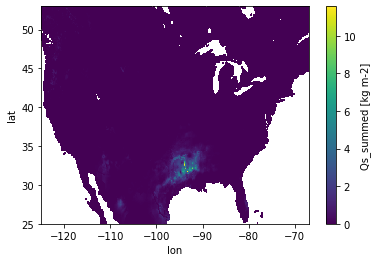

In [66]:
z1.Qs_summed.plot()

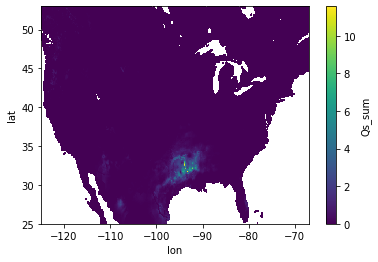

In [53]:
z.Qs_sum.plot()

In [44]:
zz.Qs0 + z.Qs1

<xarray.DataArray (lat: 224, lon: 464)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -124.9 -124.8 -124.7 -124.6 ... -67.31 -67.19 -67.06
  * lat      (lat) float32 25.06 25.19 25.31 25.44 ... 52.56 52.69 52.81 52.94

In [37]:
z

<xarray.Dataset>
Dimensions:  (lat: 224, lon: 464)
Coordinates:
  * lon      (lon) float32 -124.9 -124.8 -124.7 -124.6 ... -67.31 -67.19 -67.06
  * lat      (lat) float32 25.06 25.19 25.31 25.44 ... 52.56 52.69 52.81 52.94
Data variables: (12/48)
    Qs0      (lat, lon) float32 nan nan nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0
    Qsb0     (lat, lon) float32 nan nan nan nan ... 0.0176 0.017 0.017 0.0141
    Qs1      (lat, lon) float32 nan nan nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0
    Qsb1     (lat, lon) float32 nan nan nan nan ... 0.0176 0.017 0.017 0.0141
    Qs2      (lat, lon) float32 nan nan nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0
    Qsb2     (lat, lon) float32 nan nan nan nan ... 0.0176 0.017 0.0169 0.0141
    ...       ...
    Qs21     (lat, lon) float32 nan nan nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0
    Qsb21    (lat, lon) float32 nan nan nan nan ... 0.0173 0.0167 0.0166 0.0139
    Qs22     (lat, lon) float32 nan nan nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0
    Qsb22    (lat, lon) float32 nan nan nan nan ... 0.0173 0.0166 0.0166 0.0139
    Qs23     (lat, lon) float32 nan nan nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0
    Qsb23    (lat, lon) float32 nan nan nan nan ... 0.0173 0.0166 0.0166 0.0139

In [ ]:
# def clip2miss(raster,basin):
#     rast = xr.open_dataset(raster,decode_coords="all")
#     rast.rio.write_crs(4326,inplace=True)
#     r_clip = rast.rio.clip(basin.geometry.apply(mapping),basin.crs)
# #     plt.imshow(np.where(r_clip[0]<0,np.nan,r_clip[0]))
#     r_clip.to_netcdf('missnldas.nc')
#     return r_clip

# raster = 'NLDAS_VIC0125_H.A20150101.0000.020.nc' #selected first 
# basin = geopandas.read_file('/work/albertl_uri_edu/fluxtoflow/mississippi/shapefile/Miss_RiverBasin.shp')

# mississippi_soilmoistureprofile = clip2miss(raster,basin)

In [70]:
a = glob.glob('nc_sorted/*/*')
len(a)

2617

In [73]:
glob.glob(f'{a[0]}/*.nc')

['nc_sorted/2015/0101/NLDAS_VIC0125_H.A20150101.0000.020.nc',
 'nc_sorted/2015/0101/NLDAS_VIC0125_H.A20150101.0100.020.nc',
 'nc_sorted/2015/0101/NLDAS_VIC0125_H.A20150101.0200.020.nc',
 'nc_sorted/2015/0101/NLDAS_VIC0125_H.A20150101.0300.020.nc',
 'nc_sorted/2015/0101/NLDAS_VIC0125_H.A20150101.0400.020.nc',
 'nc_sorted/2015/0101/NLDAS_VIC0125_H.A20150101.0500.020.nc',
 'nc_sorted/2015/0101/NLDAS_VIC0125_H.A20150101.0600.020.nc',
 'nc_sorted/2015/0101/NLDAS_VIC0125_H.A20150101.0700.020.nc',
 'nc_sorted/2015/0101/NLDAS_VIC0125_H.A20150101.0800.020.nc',
 'nc_sorted/2015/0101/NLDAS_VIC0125_H.A20150101.0900.020.nc',
 'nc_sorted/2015/0101/NLDAS_VIC0125_H.A20150101.1000.020.nc',
 'nc_sorted/2015/0101/NLDAS_VIC0125_H.A20150101.1100.020.nc',
 'nc_sorted/2015/0101/NLDAS_VIC0125_H.A20150101.1200.020.nc',
 'nc_sorted/2015/0101/NLDAS_VIC0125_H.A20150101.1300.020.nc',
 'nc_sorted/2015/0101/NLDAS_VIC0125_H.A20150101.1400.020.nc',
 'nc_sorted/2015/0101/NLDAS_VIC0125_H.A20150101.1500.020.nc',
 'nc_sor

In [80]:
x0 = glob.glob('nc_sorted/*/*')

for a in x0:
    b = glob.glob(f'{a}/*.nc')
    # print(b[0][20:45]) #gets string for filename at bottom
    for idx,i in enumerate(b): #x here is one day, so twenty four .nc files
        j = xr.open_dataset(i)
        if idx == 0:
            z = xr.Dataset(
                {
                    "Qs0":(["lat","lon"],j.Qs.data[0], {"units": "kg m-2"}),
                    "Qsb0":(["lat","lon"],j.Qsb.data[0], {"units": "kg m-2"}),
                },
                coords = {
                    "lon":(["lon"],j.lon.data),
                    "lat":(["lat"],j.lat.data),
                },
            )
        else:
            z[f"Qs{str(idx)}"] = (["lat","lon"],j.Qs.data[0], {"units": "kg m-2"})
            z[f"Qsb{str(idx)}"] = (["lat","lon"],j.Qsb.data[0], {"units": "kg m-2"})


    z["Qs_sum"] = (["lat","lon"],z.Qs0.data + z.Qs1.data\
                  + z.Qs2.data + z.Qs3.data + z.Qs4.data\
                  + z.Qs5.data + z.Qs6.data + z.Qs7.data\
                  + z.Qs8.data + z.Qs9.data + z.Qs10.data\
                  + z.Qs11.data + z.Qs12.data + z.Qs13.data\
                  + z.Qs14.data + z.Qs15.data + z.Qs16.data\
                  + z.Qs17.data + z.Qs18.data + z.Qs19.data\
                  + z.Qs20.data + z.Qs21.data + z.Qs22.data\
                  + z.Qs23.data, {"units": "kg m-2"})
    z["Qsb_sum"] = (["lat","lon"],z.Qsb0.data + z.Qsb1.data\
                  + z.Qsb2.data + z.Qsb3.data + z.Qsb4.data\
                  + z.Qsb5.data + z.Qsb6.data + z.Qsb7.data\
                  + z.Qsb8.data + z.Qsb9.data + z.Qsb10.data\
                  + z.Qsb11.data + z.Qsb12.data + z.Qsb13.data\
                  + z.Qsb14.data + z.Qsb15.data + z.Qsb16.data\
                  + z.Qsb17.data + z.Qsb18.data + z.Qsb19.data\
                  + z.Qsb20.data + z.Qsb21.data + z.Qsb22.data\
                  + z.Qsb23.data, {"units": "kg m-2"})
    # z.to_netcdf('sample_q_summed.nc')


    z1 = xr.Dataset(
            {
                "Qs_summed":(["lat","lon"],z.Qs_sum.data, {"units": "kg m-2"}),
                "Qsb_summed":(["lat","lon"],z.Qsb_sum.data, {"units": "kg m-2"}),
            },
            coords = {
                "lon":(["lon"],z.lon.data),
                "lat":(["lat"],z.lat.data),
            },
        )
    z1.to_netcdf(f'summed/{i[20:45]}_SUMMED.nc')
    break

In [85]:
len(x0)

2617

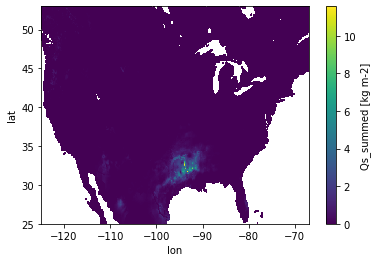

In [89]:
z1.Qs_summed.plot()

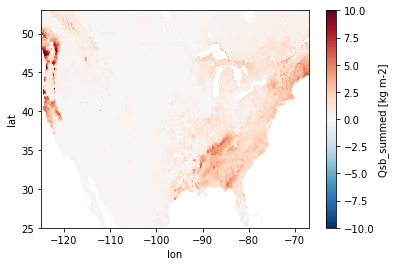

In [88]:
z1.Qsb_summed.plot()